In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")

In [23]:
ATAC.head ()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,23377.00,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,0.10,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,0.10,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


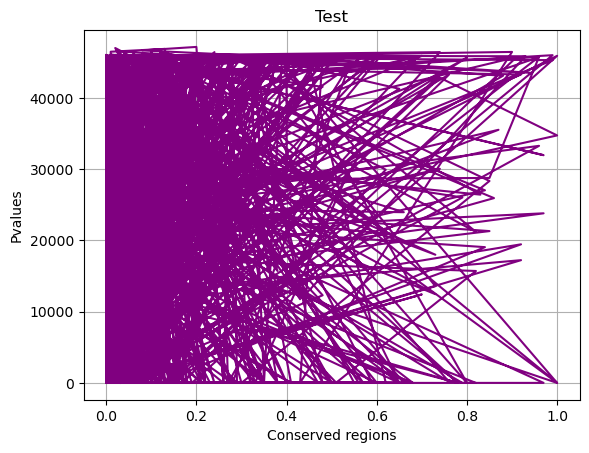

In [30]:
df_sampled = df.sample(n=1000, random_state=42)
plt.plot(df_sampled["mm10.60way.phastCons_scores"], df_sampled["_-log10_bestPvalue"], c= "purple")
plt.xlabel("Conserved regions")
plt.ylabel("Pvalues")
plt.title("Test")
plt.grid(True)
plt.show()

In [32]:
QC_Metrics = pd.read_csv("data/ATAC_QCmatric.CSV", sep=";")

QC_Metrics.head()

,SampleName,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,"4,58",2470102,"10,6",NaN
1,LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,"3,17",7675501,"7,7",NaN
2,STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,"3,25",6060045,"11,13",NaN
3,MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,"13,83",6128252,"18,96",NaN
4,proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,"7,67",6588564,"13,21","0,868"


In [38]:
df_sampled = df.sample(n=1000, random_state=42)
plt.plot (df_sampled["%fragment.1Kb_TSS"], c="green")

KeyError: '%fragment.1Kb_TSS'